# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** Looking at the pygame visual simulation and running agent.py as is, the driving agent (white car) does not move at all, even if the simulation is run for a long time (I paused it on 50+ steps). The agent state is not updated at each step, and agent is not forced to meet any deadlines. As is evident in both the visual simulation as well as the console output, the agent receives rewards even though it doesn't move. It is given positive rewards for 'proper' idling at a red light and negative rewards for idling at a green light with no incoming traffic. In addition, the actual amount of the reward also differs in that the agent is penalized with a higher -ve reward versus a much lower positive reward. The positive rewards are within 0-3 points versus the negative rewards that are generally between -4 and -6 points.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** Responses for each file below: <br> 
**agent.py** <br>
1) When creating the driving agent, we can set learning to True or False; True would enforce Q learning on the agent. Once set to True, we would also need to set both the exploration factor as well as the learning rate, which are epsilon and alpha respectively <br>
2) We can enforce a deadline on the agent by changing enforce_deadline to True (gets called from environment.py) <br>
3) When running the simulation, we can change our epsilon tolerance i.e. minimum epsilon necessary before testing begins (gets called from simulator.py)

**environment.py** - The act function within the Environment class is called when an agent performs an action.

**simulator.py** - The difference between the two functions is how the simulation results/output are shown. The render_text() function displays the simulation results in the terminal in text form versus the render(), which in the case of this project, uses pygame to show a visual display of the simulation. The pygame window shows the all agents as they move in every step, and also provides similar information as the render_text() such as agent state, action, rewards and deadlines. 

**planner.py** - The next_waypoint() function considers the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


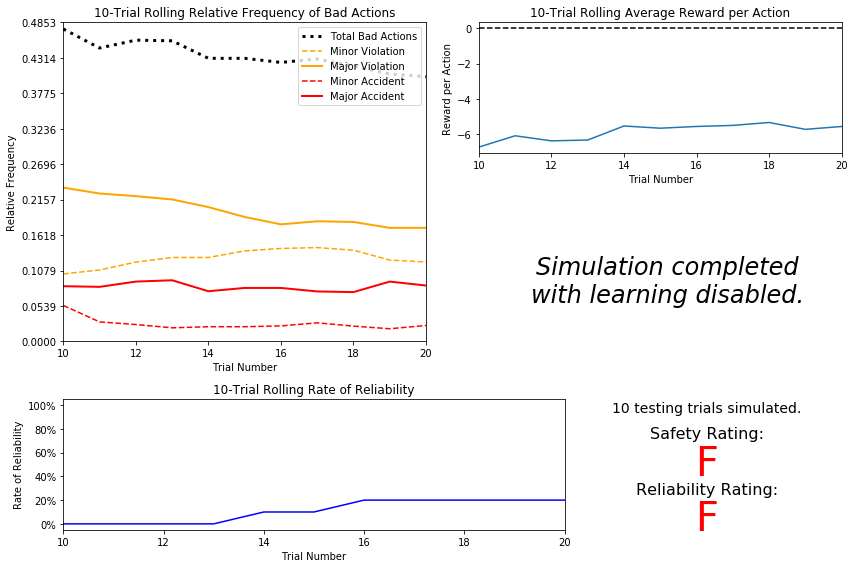

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** At the start of the training trials, the agent is taking bad actions almost 50% of the time. Over the course of the 20 trials, the agent is getting into major accidents 8-9% of the time, and minor ones 3-5% of the time. 

Considering that the agent is taking completely random actions at each step and is also not learning, it is unsurprising that it gets a poor safety and reliability rating of F. On the top left chart, we see that the agent has a high frequency of taking bad actions. The agent is making a lot more violations than accidents, and throughout the 20 trials, the agent is consistently making a higher number of major accidents and violations versus minor ones. The rate of reliability remains flat and at/near 0% till about 13 trials, after which it increases slightly, finally stabilizing at about 20%. While this is slightly better than staying at 0%, the agent is obviously performing quite poorly overall.

As mentioned at the start of the project, the rewards are setup to be higher in absolute terms when the agent makes an error. Given the current reward structure, the top right chart corresponds to the top left in that the agent is penalized quite heavily for its bad actions. We can see a relationship between the two, as during trials 11-14, the agent's frequency of bad actions goes up slightly, while its rewards go down (negatively) during that timeframe. However, the outcome of the results do not change significantly as we increase the number of trials.

This smartcab would not be considered safe or reliable for its passengers because it is a) taking random actions that do no relate to the environment (such as a red light or oncoming traffic) and b) not learning from its mistakes and therefore not improving or maximizing its rewards function.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** Each feature available to the agent is important for either safety or efficiency or both. However, I'd argue that 'inputs' is the most important feature as we'd prioritize safety over efficiency in the real world. 'inputs' is also important as it teaches the agent when to idle in a state versus moving and potentially causing an accident. 'waypoint' and 'deadline' are largely relevant to efficiency as they would help the agent learn the most efficient route to reach a pre-determined location in the fastest way. One other thing to note however, is that 'waypoint' or 'deadline' alone are not as important, as we want the agent to drive safely first, and then aim to improve efficiency on its route. 

Features to include:
- Waypoint - it is important to let the agent know where it needs to go. 
- left (input) - important for the agent to know where the vehicle on its left is about to go in the next step. This is irrelevant when the light is red, however, knowing what action the vehicle is going to take will let the agent know where it can and cannot go i.e. if the vehicle is going forward, the agent needs to learn to wait.
- oncoming (input) - similar to the left input, the agent needs to learn _not_ to make left turns when the oncoming vehicle is going forward. The agent, in this instance, can make a right turn provided the light is green.
- light (input) - agent needs to learn when to idle and when to perform other actions like moving left, right or forward. Without this feature, the agent would violate the most basic traffic rules.

Features nots included:
- Deadline - including it may mean that the agent will weight it the same or in a similar fashion as it does safety meausures. In fact, the agent may end up getting into more accidents because it is trying to reach the destination on time. 
- right (input) - the feature isn't necessary to include in the space as it is not giving much new information to the ageng in its learning given we are following US traffic laws i.e. the agent only needs to care about oncoming and left traffic along with the light in order to make valid actions. Example, if the light is green or red and no traffic from the left or oncoming is in the agent's way, the agent has enough information to take an action without caring about the vehicle on its right.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** While not impossible, it would be difficult for the agent to learn a policy for each possible state in a reasonable number of training trials, even if I choose to initially teach the agent to focus on safety along with keeping a destination feature i.e. dropping the deadline feature only. Keeping the features as I planned, the number of states would be:

light: 2 states (red, green)
left/right/oncoming: will all have 4 states each (none, forward, left, right)
waypoint: 3 states (forward, left, right)

or a total of 2 x 4 x 4 x 4 x 3 = 384 states.

However, we can reduce these further by dropping more features from the list. In our current environment, a right turn is permitted in all light states except when there is oncoming traffic from the agent's left. Since we can get this information from the 'left' and 'incoming' features, we can then drop 'right' from our function. Then, we are left with light, left, oncoming and waypoint or 2 x 4 x 4 x 3 = 96 states, which is a good amount for the agent to learn without running too many training trials. Of course, the goal is to first focus on safety, so leaving 'deadline' out of this also seems reasonable.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

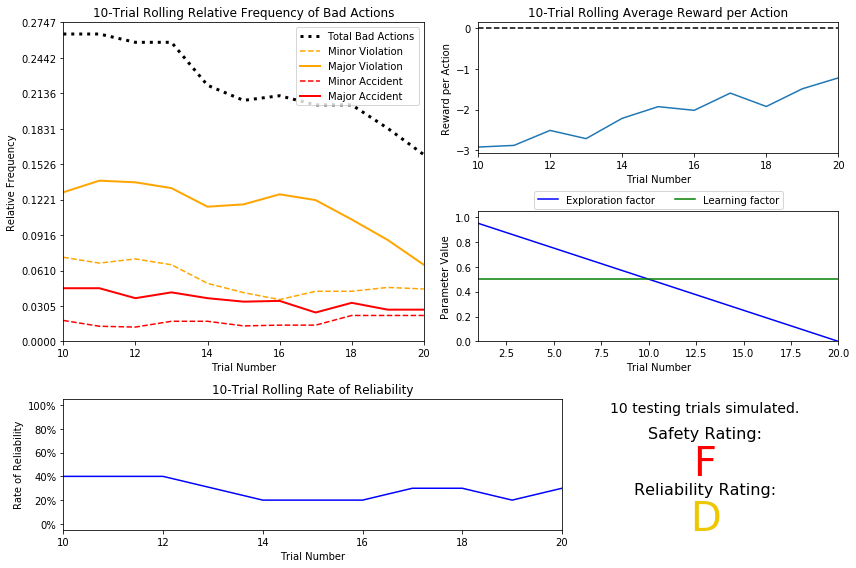

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** The agent overall performance is still quite weak, with a safety rating of F and a reliability rating of D. In the top left chart, note that the frequency of bad actions, major violations & major accidents go down as no. of trials increase, although the rate of decline of major accidents is not significant. Minor violations do go down with every trial, but there is minimal change for minor accidents. The frequency of all 5 of these measures generally going down with increasing trials is met with increasing rewards. Although the rewards do show some improvement through the course of all trials, they generally remain in the negative territory signaling that the agent still has a lot to learn. Interestingly, the reliability rate starts at 40% but shows an overall decline by the end of the trial period. Please note that alpha is kept constant, and the decay rate for epsilon is -0.05 at every step. Overall, there is a lot of room for improvement in this agent, and the poor ratings do not suggest putting the agent on the road yet. 

The default Q-Learning agent has some similarities with the basic agent:
1) both experience a decline in bad actions, minor/major violations as no. of trials increase. Both agents also show minimal movement for minor/major accidents, thereby landing at an F safety rating 
2) both agents have a higher frequency of violations to accidents
3) both agents show very low reliability ratings over time, although the Q-Learning agent ends up at a higher % overall.

The driving agent required 20 training trials before testing as the default which makes sense given the epsilon tolerance. The decay rate of -0.05 is accurately represented (linear). The safety rating for the Q-Learning agent is the same as the basic agent (F), although the reliability rating is better for the Q-Learning agent. I did a few test runs by slowing the decay/raising no. of trials, and the ratings seem to show improvements which means that this agent needs more time to explore prior to testing.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

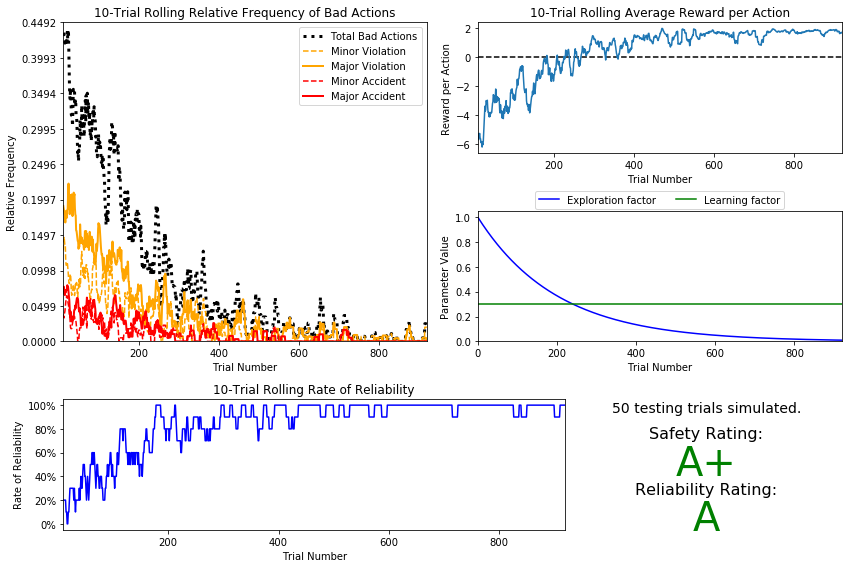

In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** The agent's overall performance, both in terms of safety and reliability have gone up significantly in the optimized version of the Q-Learning simulation. As in prior simluations, the agent's frequency of making bad decisions goes down as number of trials increase, although it drops down to a much lower level than before. The number of violations and accidents, both minor and major, also go down to a much lower level than before, as no. of trials go up. It seems as though the agent is still making more major violations/accidents as compared to minor ones, but the frequency rate is not high enough to be alarming. We also see that as # of bad actions go down, the agent’s rolling avg. reward per action goes up. After reaching about 400 trials, the agent receives mostly positive rewards with very few slip-ups. This can also be seen in the reliability rate, which starts to stabilize @ 90% or above after about 500 trials.

However, to get to this level of performance, I did have to increase the number of training trials by a lot versus the default (20). Initially, I started with a decay of -0.05, which ended up with a very poor safety rating of F. Switching to a * 0.995 decay helped improve the results quite a bit. I also tried different values of alpha, starting with the default rate of 0.5, and then lowered it to alpha=0.3 and used an epsilon tolerance=0.01. I lowered the alpha so as to give the agent a lot more training trials and make it less biased to recent information, and the low tolerance allows the agent to have enough time to use the learning factor.

A few notes that answer the remaining questions above:
- Default trails = 20, but I found that to fully optimize my model i.e. get the best rating and have the agent gravitate towards positive rewards more often than not, I needed to increase the # of trials quite a bit. As can be seen in the charts, I ended up with around 1000 trials, although 500 or so would give similar results. Only after 500 trials does the agent really start to maintain positive rolling rewards, and the reliability rate stays at a really high rate. I also increased the no. of testing trials from 10 to 50, to see if the agent performed well in scenarios it may not encounter if trials were only 10. 
- There is a very noticeable improvement in this Q-Learner versus the default one, going from F/D ratings to A+/A. This makes sense as the agent didn’t get enough time to explore, but as we slow down the epsilon decay and allow for more time, the agent starts to perform much better. I was able to get an A+/A+ rating by sticking to the default tolerance for epsilon and keeping testing trials as 10, but I believe the current setup provides a better overall simulation for the agent. Although rating goes from A+ to A for reliability, I feel more confident in this result.
- I am satisfied with the ratings of the Smartcab, and I think the agent learnt an appropriate policy given the state space. However, in the real world, we would need to optimize an agent on a much larger state space as this project focused on a few, but not all, traffic rules and regulations (such as pedestrians, weather conditions, speed limits etc.)

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** Answers to questions below in order:

**1)** For the environment we have setup for this agent, I would summarize the optimal policy as below, looking at various scenarios and ensuring that the agent's actions are exactly like they would be in a real-world scenario. However, an optimal policy, one that would accomodate all rules, would include the two features I didn't, in the simulation as well.

**Inputs**
If _light=green_, and there is no oncoming traffic in the direction the agent needs to go (follow waypoint), then agent can move and gets a reward. If there is oncoming traffic, the agent should do nothing. <br>
otherwise if light = red, action is always None _unless_ there is no oncoming traffic form agent's left and agent needs to go right. If agent moves in the former scenario, we want to penalize it heavily as the action can cause an accident.<br>
For _oncoming traffic_ (when light=green), <br>
If traffic=forward, agent can move in all directions except left<br>
If traffic=right, agent can move in all directions except left<br>
If traffic=left, agent can turn left<br>

**Waypoint**
Agent reaches correct destination. A high penalty should be served for not reaching the destination.

**Deadline**
Agent minimizes time taken to reach destination. A high penalty should be served for not reaching the destination on time.

**2) & 3)** The optimal policy I defined above assumes we use all information available to us. In the case of the simulation I went with, we are focused on the agent optimizing inputs and waypoint, but not deadline. Looking at the first few results in the text file, the policy is correct for every given state, as per the notes shared above. The order is waypoint, light, oncoming, direction.

**Correct policy** - agent gets high penalty for turning left and causing a potential accident.<br>
('left', 'green', 'forward', 'left')<br>
 -- None : -3.38<br>
 -- forward : 0.76<br>
 -- right : 0.45<br>
 -- left : -10.16<br>

**Correct policy** - agent gets highest reward by following waypoint, but gets penalized heavily for turning left into oncoming traffic.<br>
('right', 'green', 'forward', 'right')<br>
 -- None : 0.00<br>
 -- forward : 0.32<br>
 -- right : 1.38<br>
 -- left : -6.09<br>

**Correct policy** - since light=red, agent gets highest reward by staying put.<br>
('left', 'red', 'right', 'left')<br>
 -- None : 1.69<br>
 -- forward : 0.00<br>
 -- right : 0.36<br>
 -- left : -11.87<br>

4) From the logs, the agent did not learn the optimal policy in the instance:

('right', 'green', 'right', 'forward')
 -- None : 0.00
 -- forward : 0.65
 -- right : 0.32
 -- left : -10.04
 
Here, the agent could follow the waypoint and turn right, but it did not. I think these instances occur more often in the first few trials, so it is likely that the agent didn't learn teh optimal policy because it hasn't been given enough time or trials to learn just yet


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** The agent has waypoint information but it is limited to what direction it needs to go in for the next step. Because the agent doesn't need to learn the best route to its destination and/or what action it should take 2-3 steps from the current state, future rewards won't do much here. In addition, vehicles in the environment are always moving, and the agent is not learning anything about traffic a few steps ahead of itself. Finally, the start and end for the agent changes for every trial we run, so there is no learning being transferred from one trial to the next.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.